In [9]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(X_train,y_train), (X_test,y_test)=datasets.cifar10.load_data()

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
classes=['airplane','automobile','bird','cat','dog','deer','dog','frog','horse','ship','truck']

In [15]:
def plot_sample(X,y, index):
    plt.figure(figsize=(10,7))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

TypeError: only integer scalar arrays can be converted to a scalar index

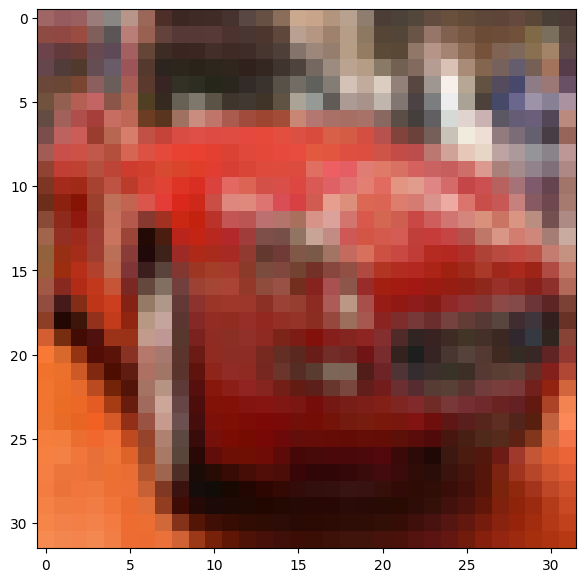

In [17]:
plot_sample(X_train,y_train, 5)

TypeError: only integer scalar arrays can be converted to a scalar index

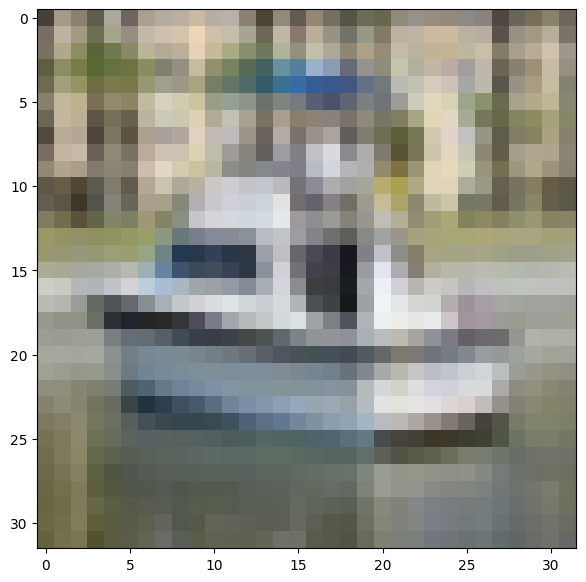

In [18]:
plot_sample(X_train,y_train,501)

In [19]:
X_train=X_train/255.0
X_test=X_test/255.0

In [20]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.2974 - loss: 1.9385
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.4195 - loss: 1.6513
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4538 - loss: 1.5481
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4713 - loss: 1.4949
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4921 - loss: 1.4382


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification_report:\n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      1000
           1       0.67      0.56      0.61      1000
           2       0.41      0.21      0.28      1000
           3       0.30      0.41      0.35      1000
           4       0.42      0.44      0.43      1000
           5       0.32      0.46      0.38      1000
           6       0.50      0.57      0.53      1000
           7       0.56      0.53      0.55      1000
           8       0.58      0.63      0.60      1000
           9       0.67      0.43      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [ ]:


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])


   

C:\Users\archi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3797 - loss: 1.7105
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5918 - loss: 1.1476
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6498 - loss: 0.9945


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6750 - loss: 0.9536


[0.9655171632766724, 0.6686999797821045]

In [ ]:
y_pred= cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[1.59143135e-02, 1.59209140e-03, 4.09585759e-02, 5.41597366e-01,
        3.15769692e-03, 2.56205916e-01, 3.31747569e-02, 1.24231924e-03,
        9.82346833e-02, 7.92227499e-03],
       [3.94858085e-02, 2.96610504e-01, 3.54769654e-05, 2.88215087e-05,
        1.35720175e-05, 7.22508673e-07, 3.95388815e-06, 1.93039773e-06,
        6.57557607e-01, 6.26173429e-03],
       [1.30054995e-01, 1.71908528e-01, 6.86958292e-03, 1.43110584e-02,
        6.52307412e-03, 2.00196053e-03, 9.30188398e-04, 2.88140215e-03,
        6.22413218e-01, 4.21060845e-02],
       [7.59304285e-01, 8.37077275e-02, 2.90211812e-02, 1.88298535e-03,
        8.63643549e-03, 2.85926599e-05, 8.33668862e-04, 1.59041432e-04,
        1.16293870e-01, 1.32247427e-04],
       [1.13460279e-04, 4.57223723e-05, 2.40523517e-02, 2.03460604e-02,
        6.97198987e-01, 1.68743245e-02, 2.41052061e-01, 1.81601790e-04,
        1.19829696e-04, 1.56371261e-05]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

TypeError: only integer scalar arrays can be converted to a scalar index

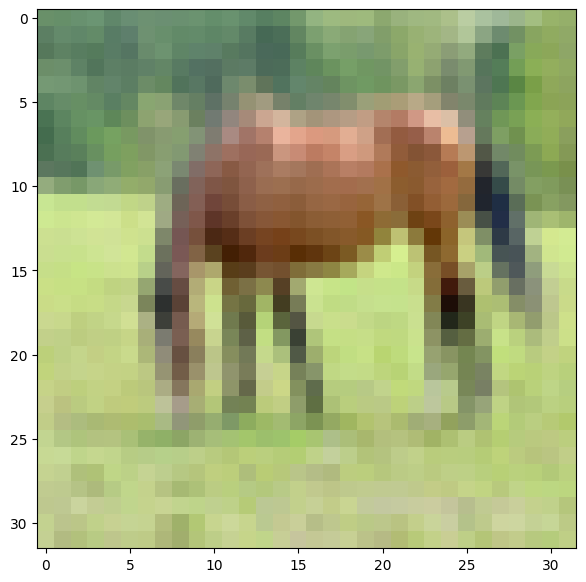

In [ ]:
plot_sample(X_test,y_test, 60)